# EXPLORATORY DATA ANALYSIS AND VISUALIZATION WITH PYTHON
*by Dr. Kuleafenu Joachim*
<pre>




</pre>

# 1.) A LITTLE INFORMATION ABOUT THE DATA SET

<pre>


</pre>
* This Data Set is about less endowed students(High School students in the deprived communities) program introduced by the Kwame Nkrumah University of Science and Technology.
* The data is extracted from the KNUST official website,click here to view from the site.
#### NB: THE DATA IS USED STRICTLY FOR EDUCATIONAL PURPOSES

## 2.) Lets start by  importing some libraries to scrap the data from the website

In [1]:

from urllib.request import Request,urlopen
from bs4 import BeautifulSoup

## 3.) lets write this HTML script to add borders to the dataset

In [5]:
%%HTML
<style type='text/css'>
table.dataframe td,table.dataframe th{
     border: 1px solid black !important;
     color: black !important;
}
</style>

## 4.) Import some libraries to help through our exploratory data analysis and visualization

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

## 5). Load the Data Set with pandas read_csv() function

In [31]:
# This is to load the student dataset into pandas dataframe
knust_df = pd.read_csv('knust_stu.csv')
# Lets check the head of the data
knust_df.head()

,Unnamed: 0,#,Full Name,Programme,School,Region
0,0,1,"APPIAH, KELVIN (Mr.)",BSC. MECHANICAL ENG.,ACHINAKROM SNR HIGH SCHOOL,ASHANTI
1,1,2,"BAAFI, FRANCISCA (Miss)",BSC. CONSTRUCTION TECH. & MGT.,ACHINAKROM SNR HIGH SCHOOL,ASHANTI
2,2,3,"DUODUWAA, ROSE (Miss)",BSC. HOSPITALITY AND TOURISM MANAGEMENT,ACHINAKROM SNR HIGH SCHOOL,ASHANTI
3,3,4,"DZRAMADO, KENNEDY SOLOMON (Mr.)","BSC. HUMAN BIOLOGY, MB.CH.B",ACHINAKROM SNR HIGH SCHOOL,ASHANTI
4,4,5,"OSEI, THOMAS (Mr.)",BA. ECONOMICS,ACHINAKROM SNR HIGH SCHOOL,ASHANTI


In [32]:
# The above data contains two irrelevant datasets, the first two columns.
# It doesn't really contribute to the goal of this project, it is just number of entries being listed. We can safely drop
# it

knust_df.drop(['Unnamed: 0','#'],axis=1,inplace=True)

# 6).These are the distribution of the features of the dataset

In [33]:
knust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
Full Name    1500 non-null object
Programme    1500 non-null object
School       1500 non-null object
Region       1500 non-null object
dtypes: object(4)
memory usage: 47.0+ KB


### some observations:
* The total number of students recorded is 1500  
* All the four features are object(non-numeric) variables
* It contains the folowing features:
   * Full Name (String Data type)
   * Programme (String Data type)
   * School (String Data type)
   * Region (String Data type)

In [21]:
knust_df.describe(include='all')

,Full Name,Programme,School,Region
count,1500,1500,1500,1500
unique,1484,78,277,10
top,"YAKUBU, ISAAC (Mr.)",BA. HISTORY,SEKYEDUMASE SNR HIGH SCHOOL,EASTERN
freq,2,97,11,250


### some observations:
    - There are 1484 out of 1500 distinct names, 277 schools selected from all the 10 regions in Ghana

In [22]:
# lets make a copy of the actual data set into 'df' dataframe
df= knust_df.copy()

In [23]:
df.sample(5)

,Full Name,Programme,School,Region
357,"AKWABOAH, PRINCE (Mr.)",BA. POLITICAL STUDIES,KUKUOM AGRIC. SNR. HIGH SCHOOL,BRONG AHAFO
1243,"TINKU, MAXWELL (Mr.)",BA. RELIGIOUS STUDIES,BAGLO SNR. HIGH/TECH SCHOOL,VOLTA
669,"KYEI, GIBSON (Mr.)",BA. GEOGRAPHY AND RURAL DEVELOPMENT,OGUAA SNR HIGH/TECH. SCHOOL,CENTRAL
615,"ASHARTEY, ERICA NARKUOR (Miss)",BSC. HOSPITALITY AND TOURISM MANAGEMENT,MANDO SNR HIGH TECH. SCHOOL,CENTRAL
854,"OWUSU, MAVIS (Miss)",BA. LINGUISTICS,METHODIST GIRLS HIGH SCH MAMFE,EASTERN


In [24]:
# We are now going to group each student according to gender.
# This can be done by using the 'Miss' and 'Mr' which is at the end of every name
x,y = (df['Full Name'].str[-6:].str.strip()).value_counts(),(df['Full Name'].str[-6:].str.strip()).value_counts(normalize=True)
print(x)
print(y*100)

(Mr.)     824
(Miss)    676
Name: Full Name, dtype: int64
(Mr.)     54.933333
(Miss)    45.066667
Name: Full Name, dtype: float64


### Some Observations:
    * Out of the 1500 students, the female students are 676 representing 45.07%
    * The male students are 824 representing 54.93%

## 7).Lets now take a look at the number of regions the program affected and the percentage of students number

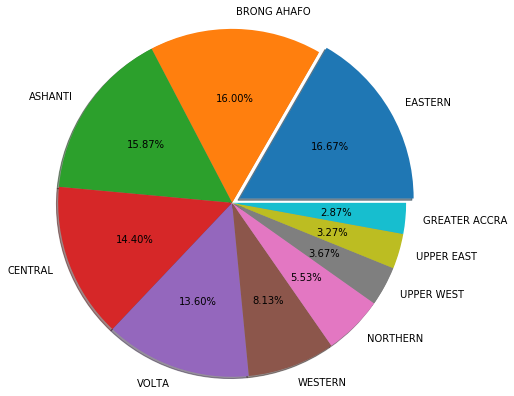

In [29]:
### Lets now check the regions affected by the programs
reg_name,reg_stu_num = df['Region'].value_counts().index,df['Region'].value_counts().values
fig,ax = plt.subplots()
# This is to explode the region with most number of students
explode=[0]*len(reg_name)
explode[0]=0.1
ax.pie(reg_stu_num,labels=reg_name,autopct='%1.2f%%',shadow=True,explode=explode,radius=2);

### Observation:
    * Students were picked from every region(10) 
    * Eastern region recorded the highest number of students

In [36]:
region = (df['Region'].value_counts(normalize=True)*100)
print('{} region has the largest number of students  with a percentage of {}%'.format(region.idxmax(),np.round(region.max(),2)))
print('{} region has the least number of students  with a percentage of {}%'.format(region.idxmin(),np.round(region.min(),2)))

EASTERN region has the largest number of students  with a percentage of 16.67%
GREATER ACCRA region has the least number of students  with a percentage of 2.87%


### These facts about the data makes sense because Greater Accra is the Capital town of Ghana,  and its considered as the most developed  City in Ghana which would obviously have less deprive areas.

# 8). We are now going to do data preprocessing activities

### We are going to extract the gender and the first names of students as new columns

In [37]:
# If the name ends with (Miss) put 'F' else if its (Mr) put 'M'
df['sex'] = (df['Full Name'].str[-6:].str.strip()).apply(lambda x : 'M' if '(Mr.)' in x else 'F')
# We divide split the full name by '(' then we take the first split
df['Full Name'] = df['Full Name'].str.split('(').str[0]
# This code also take the first name of every name 
df['f_name'] = df['Full Name'].str.split(',').str[1].str.split(' ').str[-2]


### Lets visualize the gender in percentage-wise of students

This demostrate the percentage of females and males selected


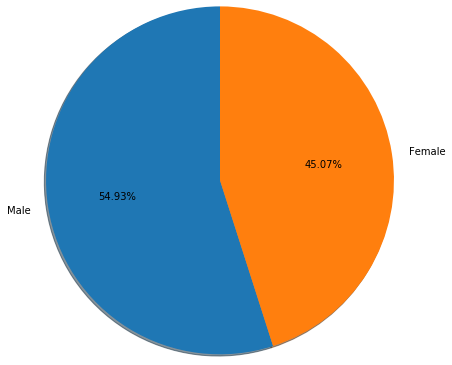

In [39]:
plt.figure()
male,female = (df['sex']).value_counts().items()
plt.pie(np.array([male[1],female[1]]),labels=['Male','Female'],autopct='%1.2f%%',shadow=True,startangle=90,radius=2);
print('This demostrate the percentage of females and males selected')

### some observation
    * The percentage of male and female is 54.93% and 45.07% respectively

In [40]:
# Now lets check 10 randomly selected entries
df.sample(10)

,Full Name,Programme,School,Region,sex,f_name
869,"OFORI, ESENAM ANGELA",BA. ECONOMICS,NEW NSUTAM SNR HIGH/TECH SCH,EASTERN,F,ANGELA
1277,"NOAMESI, MILLICENT AKU",BA. SOCIOLOGY,KPEDZE SNR HIGH SCHOOL,VOLTA,F,AKU
1123,"ANG-KAARAMA, ANSELM",BSC. BUSINESS ADMINISTRATION (MARKETING/INTERN...,JIRAPA SNR HIGH SCHOOL,UPPER WEST,M,ANSELM
1370,"KUNAKI, BLESS RAYMOND",BA. HISTORY,WOVENU SNR HIGH/TECH SCHOOL,VOLTA,M,RAYMOND
235,"OBOUR, THOMAS",BSC. LAND ECONOMY,TOASE SNR HIGH SCHOOL,ASHANTI,M,THOMAS
29,"BAMAH, KUMI MERCY",BSC. LAND ECONOMY,AGOGO STATE COLLEGE,ASHANTI,F,MERCY
1167,"MAHAMA, ADAMS",BSC. BUSINESS ADMINISTRATION (LOGISTICS AND SU...,WA ISLAMIC SNR HIGH SCHOOL,UPPER WEST,M,ADAMS
1436,"AKAKPO, PRINCE",BSC. METALLURGICAL ENG.,BOMPEH DAY SNR. HIGH/TECH SCH,WESTERN,M,PRINCE
208,"OBUOBISAH, DENNIS",BSC. DEVELOPMENT PLANNING,ST. JEROME SNR HIGH SCHOOL,ASHANTI,M,DENNIS
1290,"GBEVE, ROGER MAWULORM",BSC. DEVELOPMENT PLANNING,MAFI-KUMASE SNR HIGH/COMM SCH,VOLTA,M,MAWULORM


In [41]:
print(df.columns),print('\n')
print(df.info()),print()
df.describe()

Index(['Full Name', 'Programme', 'School', 'Region', 'sex', 'f_name'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
Full Name    1500 non-null object
Programme    1500 non-null object
School       1500 non-null object
Region       1500 non-null object
sex          1500 non-null object
f_name       1500 non-null object
dtypes: object(6)
memory usage: 70.4+ KB
None



,Full Name,Programme,School,Region,sex,f_name
count,1500,1500,1500,1500,1500,1500
unique,1484,78,277,10,2,731
top,"ODURO, EMMANUEL",BA. HISTORY,SEKYEDUMASE SNR HIGH SCHOOL,EASTERN,M,EMMANUEL
freq,2,97,11,250,824,45


# 9). Now that we are done with our exploratory data analysis we will like to visualize our data to fit our main goal

<IPython.core.display.Javascript object>


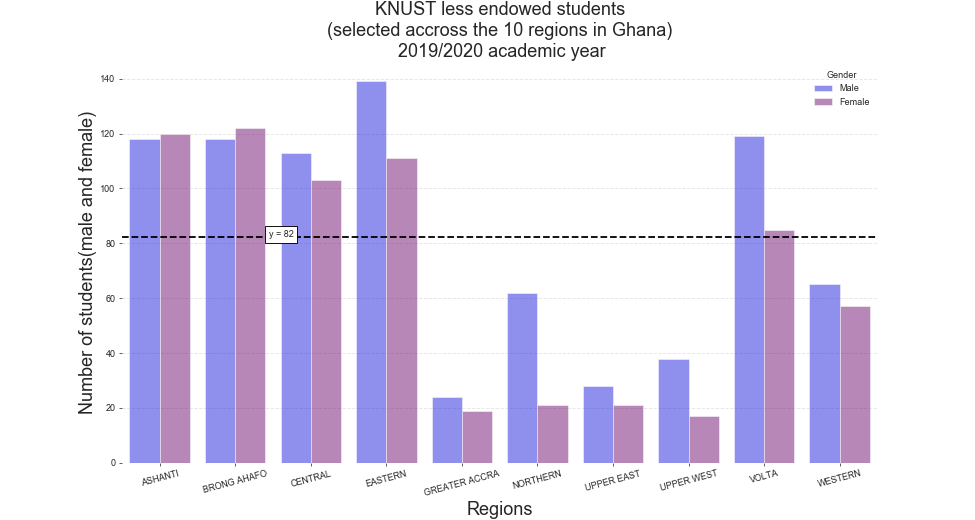

7

In [45]:
# set the background to tick
sns.set_style(style='ticks')
# plt.figure.figsize and dpi to adjust the figure size
plt.figure(figsize=(15,8),dpi=65)
# create a countplot of every students in each region and group distiguish them genderly
ax = sns.countplot(x='Region',data=df,hue='sex',palette=['blue','Purple'], alpha=0.5)
# make the grid lines invisible
ax.grid(visible = False)
# lets stylize the y grid
ax.grid(axis='y',linestyle='--',color='black',linewidth=1,alpha=0.1)
# setting the label for y-axis
ax.set_ylabel('Number of students(male and female)',fontsize=20)
# set label for the x axis
ax.set_xlabel('Regions',fontsize=20)
# set the title for the figure
ax.set_title('KNUST less endowed students\n(selected accross the 10 regions in Ghana)\n 2019/2020 academic year',
             fontsize=20)
# This iterates through the x tick labels to rotate them in an angle of 45 degrees
label_obj = ax.get_xticklabels()
for label in label_obj:
    label.set_rotation(15)
# lets clear all the spines
for spine in ax.spines['top'],ax.spines['right'],ax.spines['left'],ax.spines['bottom']:
    spine.set_visible(False)
# set the legend of our figure
plt.legend(loc=0,title='Gender',labels=['Male','Female'],frameon=False)
# this command to set matplotlib.pyplot.text on our figure
y_text = ax.text(1,1,'', bbox=dict(fc='white',ec='k'))
hoz_line = plt.axhline(linestyle='--',linewidth=2,color='black');
# This function for creating interaction on our figure
def on_click(event):
    hoz_line.set_ydata(event.ydata)
    y_text.set_text('y = %d'%event.ydata)
    y_text.set_y(event.ydata)
    y_text.set_x(event.xdata)


# let connect the figure to respond to mouse clicks
plt.gcf().canvas.mpl_connect('button_press_event',on_click)
# Save the figure into png format
# plt.savefig('k.png',dpi=75)

### For enquiries, contact me on:  
#### Email:kuleafenujoachim@gmail.com  
#### phone: +233547587743
<p style='text-align: right;font-style: italic;'>Dr. Kuleafenu Joachim</p>